### Transfer learning models:

This notebook is about transfer learning models and the reinforcement learning agent to determine whether to use the transfer learner or an active learning policy.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import src.active_learning as al
import src.viz as viz
import src.reinforcement as rl
import src.data as d 
# import active_learning as al
# import viz
# import reinforcement as rl

import importlib as imp
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data.dataset import Dataset
from torch.distributions import Categorical

%matplotlib inline

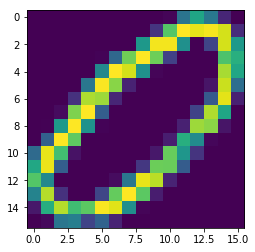

In [25]:
# Get raw datasets - MNIST
d = imp.reload(d)
train_set = dset.MNIST(root='./data', train=True, transform=transforms.ToTensor(),download=False)
test_set = dset.MNIST(root='./data', train=False, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=len(test_set),shuffle=False)

# Get raw dataset - USPS
percent_test = 0.3
usps_set = d.get_usps('usps/usps_all.mat')
usps_x, usps_y, usps_test_x, usps_test_y = al.get_dataset_split(usps_set,int(len(usps_set)*percent_test))
usps_test_loader = torch.utils.data.DataLoader(dataset=torch.utils.data.TensorDataset(usps_test_x, usps_test_y), \
                                               batch_size=len(usps_test_y),shuffle=False)
plt.imshow(usps_x[-1])

In [26]:
# Get x/y split for the test set 
train_x, train_y, val_x, val_y = al.get_dataset_split(train_set)
test_x,test_y = al.get_xy_split(test_loader)

In [27]:
# Get resnet from pytorch (trained on imagenet)

In [28]:
# train simple learner on USPS and use as transfer option